In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('movie_reviews') #download corpus
nltk.download('punkt_tab') #download tokenizer
from nltk.corpus import * #import all from corpus in nltk

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
movie_reviews.categories()

['neg', 'pos']

In [4]:
#get words from neg movie reviews
movie_neg_text = movie_reviews.words(categories='neg')
movie_neg_text

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [5]:
#get sentances from positive movie rwviews
movie_pos_sents = movie_reviews.sents(categories='pos')
movie_pos_sents

[['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success', ',', 'whether', 'they', "'", 're', 'about', 'superheroes', '(', 'batman', ',', 'superman', ',', 'spawn', ')', ',', 'or', 'geared', 'toward', 'kids', '(', 'casper', ')', 'or', 'the', 'arthouse', 'crowd', '(', 'ghost', 'world', ')', ',', 'but', 'there', "'", 's', 'never', 'really', 'been', 'a', 'comic', 'book', 'like', 'from', 'hell', 'before', '.'], ['for', 'starters', ',', 'it', 'was', 'created', 'by', 'alan', 'moore', '(', 'and', 'eddie', 'campbell', ')', ',', 'who', 'brought', 'the', 'medium', 'to', 'a', 'whole', 'new', 'level', 'in', 'the', 'mid', "'", '80s', 'with', 'a', '12', '-', 'part', 'series', 'called', 'the', 'watchmen', '.'], ...]

In [6]:
#cdf

cdf = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in movie_reviews.categories()
    for word in movie_reviews.words(categories=genre))
categories = movie_reviews.categories()
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cdf.tabulate(conditions=categories, samples=modals)

#modal words help to find the sentiment

      can could   may might  must  will 
neg  1457   791   355   343   290   944 
pos  1425   636   502   292   328  1272 


<Axes: xlabel='Samples', ylabel='Counts'>

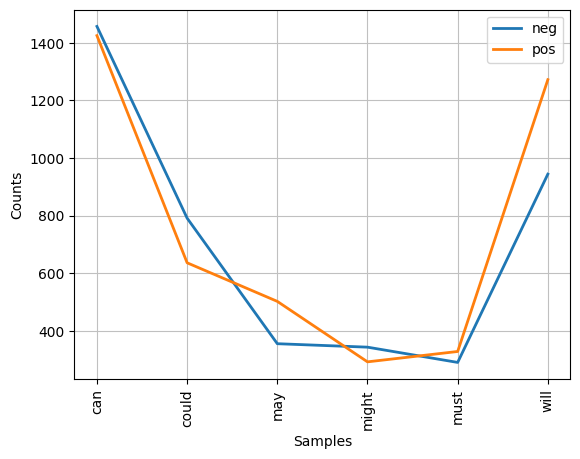

In [7]:
cdf.plot(conditions=categories, samples=modals)

In [8]:
print(type(cdf))

<class 'nltk.probability.ConditionalFreqDist'>


In [9]:
#get stopwords corpus
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
nltk.download('swadesh')
from nltk.corpus import swadesh

[nltk_data] Downloading package swadesh to /root/nltk_data...
[nltk_data]   Unzipping corpora/swadesh.zip.


In [11]:
en2fr = swadesh.entries(['en', 'fr'])

translate = dict(en2fr)

totrans = ['I', 'play', 'with', 'this', 'dog']

for wd in totrans:
  print(translate[wd])

je
jouer
avec
ceci
chien


In [12]:
import re
import regex
import pandas as pd

In [13]:
pattern = r"\b[Tt]he\b"
matches = [word for word in movie_neg_text if re.search(pattern, word)]
matches[:10]

['the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the']

In [14]:
#cleaning data; these steps are not fixed. When normalizing data for nlp, there are valid usecases for having capital letters

rawtext = """ <b>Communication<b\>
  (for Latin communication, meaning to share) """

#remove tags
text = re.sub(r"<[^>]+>", "", rawtext)
print(text)

#normalize white space
text = re.sub(r"\s+", " ", text)
print(text)

#remove punctuation
text = re.sub(r"[^\w\s]", "", text)
print(text)

#trim whitespace
text = re.sub("^\s+|\s+$", "", text)
print(text)

 Communication
  (for Latin communication, meaning to share) 
 Communication (for Latin communication, meaning to share) 
 Communication for Latin communication meaning to share 
Communication for Latin communication meaning to share


In [15]:
#regex on pandas df


url = "https://raw.githubusercontent.com/alexstorer/twittersauce/refs/heads/master/example_tweets.csv"
tweets = pd.read_csv(url, index_col="id")
#identify tweets with hashtags

tweets["tag"] = tweets.text.str.contains("/")

#How many at-mentions are there?

tweets["at"] = tweets.text.str.count(r"(^|\s)@\w+")

#Extract first url

tweets["url"] = tweets.text.str.extract(r"(https?://\S+)")

#Remove urls, tags, and @-mentions

expr=r"(^|\s)(@|#|https?://)\S+"

tweets["plain2"] = tweets.text.str.replace(expr, " ", regex=True).replace(r"\W+", " ")

In [16]:
tweets['tag'].head()

,tag
id,
290911512455962626,True
290911512485310464,False
290911512862801920,False
290911512984440833,True
290911513739419648,True


In [17]:
tweets.head()

,favorited,contributors,truncated,text,in_reply_to_status_id,user,geo,possibly_sensitive,lang,retweeted_status,...,in_reply_to_status_id_str,in_reply_to_screen_name,id_str,place,retweet_count,in_reply_to_user_id,tag,at,url,plain2
id,,,,,,,,,,,,,,,,,,,,,
290911512455962626,False,NaN,False,RT @Stwallace23: Obama: Even The Threat Of Def...,NaN,"{u'follow_request_sent': None, u'profile_use_b...",NaN,False,en,"{u'contributors': None, u'truncated': False, u...",...,NaN,NaN,290911512455962626,NaN,0,NaN,True,2,http://t.co/hkCwk2uD,RT Obama: Even The Threat Of Default Hurts Ec...
290911512485310464,False,NaN,False,"@ObamaPhoneLady\nLow minority income, disabili...",NaN,"{u'follow_request_sent': None, u'profile_use_b...",NaN,NaN,en,NaN,...,NaN,ObamaPhoneLady,290911512485310464,NaN,0,855361100.0,False,1,NaN,"\nLow minority income, disability, welfare &a..."
290911512862801920,False,NaN,False,RT @moaninglarry: One direction are in the sam...,NaN,"{u'follow_request_sent': None, u'profile_use_b...",NaN,NaN,en,"{u'user': {u'follow_request_sent': None, u'pro...",...,NaN,NaN,290911512862801920,NaN,0,NaN,False,5,NaN,RT One direction are in the same continent as...
290911512984440833,False,NaN,False,Jenice Armstrong: She's crazy for President Ob...,NaN,"{u'follow_request_sent': None, u'profile_use_b...",NaN,False,en,NaN,...,NaN,NaN,290911512984440833,NaN,0,NaN,True,0,http://t.co/V5QaDg8i,Jenice Armstrong: She's crazy for President Ob...
290911513739419648,False,NaN,False,Obama diz que seu vice apresentou formas sensí...,NaN,"{u'follow_request_sent': None, u'profile_use_b...",NaN,False,pt,NaN,...,NaN,NaN,290911513739419648,NaN,0,NaN,True,0,http://t.co/5d0V8U4c,Obama diz que seu vice apresentou formas sensí...


In [18]:
text = 'apples, pears, oranges'

#three ways to split text
items = text.split(', ')
print(items)

items = regex.split(r"\p{PUNCTUATION}\s*", text)
print(items)

items = regex.findall(r'\p{LETTER}+', text)
print(items)

items = re.findall(r'\w+', text)
print(items)

['apples', 'pears', 'oranges']
['apples', 'pears', 'oranges']
['apples', 'pears', 'oranges']
['apples', 'pears', 'oranges']


In [19]:
joined = " & ".join(items)
print(joined)

apples & pears & oranges


In [20]:
#split and extract all text from columns

tags = tweets.text.str.extractall("(@\\w+)")
tags.merge(tweets, left_on="id", right_on="id")
tags

0
id                 match                 
290911512455962626 0         @Stwallace23
                   1          @davidtaint
290911512485310464 0      @ObamaPhoneLady
290911512862801920 0        @moaninglarry
                   1               @allah
...                                   ...
290916703649554432 0      @capitalweather
290916703976701952 0      @WestJournalism
290916704404529152 0          @wakeup1442
290916705004306432 0             @onswipe
290916705394364418 0           @keblack02

[3469 rows x 1 columns]

In [21]:
#get words
words = tweets.text.str.split(r"\\W+")
words_long = words.explode()
words_long

,text
id,
290911512455962626,RT @Stwallace23: Obama: Even The Threat Of Def...
290911512485310464,"@ObamaPhoneLady\nLow minority income, disabili..."
290911512862801920,RT @moaninglarry: One direction are in the sam...
290911512984440833,Jenice Armstrong: She's crazy for President Ob...
290911513739419648,Obama diz que seu vice apresentou formas sensí...
...,...
290916703976701952,Protest Planned At Inauguration Over Obama’s S...
290916704404529152,RT @wakeup1442: Your paycheck is a little smal...
290916705004306432,#45✊👏RT Obama: Congress won’t get a “ransom in...


In [22]:
words_long.groupby('id').agg('_'.join)

,text
id,
290911512455962626,RT @Stwallace23: Obama: Even The Threat Of Def...
290911512485310464,"@ObamaPhoneLady\nLow minority income, disabili..."
290911512862801920,RT @moaninglarry: One direction are in the sam...
290911512984440833,Jenice Armstrong: She's crazy for President Ob...
290911513739419648,Obama diz que seu vice apresentou formas sensí...
...,...
290916703976701952,Protest Planned At Inauguration Over Obama’s S...
290916704404529152,RT @wakeup1442: Your paycheck is a little smal...
290916705004306432,#45✊👏RT Obama: Congress won’t get a “ransom in...


## Quiz 3 Work

In [23]:
text = "Natural Language Processing (NLP) is an emergent field of study."
items = text.split("r")
joined = " ()".join(items)

In [24]:
print(joined)

Natu ()al Language P ()ocessing (NLP) is an eme ()gent field of study.


In [27]:
import regex
import re

In [59]:
text = "/?.>< [] this is a string"
print(text)

/?.>< [] this is a string


In [60]:
print(type(text[0]))

<class 'str'>


In [73]:
pattern = r"(string|this)"

In [74]:
text = "/?.>< [] this is a string"
text = re.split(r'\s+', text)
print(text)

['/?.><', '[]', 'this', 'is', 'a', 'string']


In [75]:
matched = [word for word in text if re.search(pattern, word)]
print(matched)

['this', 'string']


In [87]:
text = "/?.>< [] this is a string"

pattern = r"(string|this)+"
matched = text.extract(pattern, text)
print(matched)

AttributeError: 'str' object has no attribute 'extract'